### **ESTABLISHING AND TESTING CONNECTION WITH MYSQL DATABASE**

In [1]:
import pymysql

In [2]:
conn = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = 'DMAProject',
    db = 're'
)

In [3]:
cur = conn.cursor()

In [5]:
cur.execute("select @@version")

1

In [6]:
output = cur.fetchall()

In [7]:
print(output)

(('8.0.31',),)


In [8]:
cur.execute("select * from agent_details")

14

In [10]:
output = cur.fetchall()

In [11]:
for i in output:
    print(i)

(1001, 'Company Agent', 'Allyn Jansie', 'Female', 'Queens', '737-596-4600', 'ajansie0@mediafire.com', '4 Eagan Way', 'Pantian', None)
(1002, 'Company Agent', 'Demetri Grishakin', 'Male', 'Manhattan', '507-146-7596', 'dgrishakin1@ucoz.ru', '65 Westridge Circle', 'Shatian', None)
(1003, 'Company Agent', "Thekla O'Hanley", 'Female', 'Staten Island', '187-663-8314', 'tohanley2@delicious.com', '8 Graceland Point', 'Bujaków', '43-356')
(1004, 'Company Agent', 'Charles Vearncomb', None, 'Brooklyn', '748-588-2657', 'cvearncomb3@vinaora.com', '48013 Center Center', 'Kotri', '76000')
(1005, 'Third-Party Agent', 'Torey Manntschke', None, 'Brooklyn', '920-427-5141', 'tmanntschke4@163.com', '498 Anthes Alley', 'Légua', '3830-247')
(1006, 'Company Agent', 'Franklin Jorg', None, 'Brooklyn', '482-772-9815', 'fjorg5@bandcamp.com', '89571 Maywood Avenue', 'Adolfo Lopez Mateos', '56528')
(1007, 'Third-Party Agent', 'Ashlee Trayte', 'Female', 'Staten Island', '656-428-0454', 'atrayte6@msn.com', '9191 Clar

### QUERIES TO GET REQUIRED METRICS
##### 1. Get the total properties sold, total sale value for every agent ID
##### 2. Get average rating against every agent ID

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [125]:
cur.execute('''select a.agentID, 
                sum(pl.rate) as total_sale_value, 
                count(distinct pl.propID) as properties_sold
                from
                re.property_listing as pl
                left join re.creates as c on c.propID = pl.propID
                left join re.agent_details as a on a.agentID = c.agentID
                group by a.agentID
                order by total_sale_value desc, properties_sold desc''')

14

In [126]:
agent_performance1 = cur.fetchall()

In [127]:
agent_performance1 = pd.DataFrame(agent_performance1)

In [128]:
agent_performance1.columns = ['Agent ID', 'Total Sale Value', 'Properties Sold']

In [129]:
cur.execute('''select agentID, format(avg(rating), 2) as avg_rating
               from re.feedback
               group by agentID
               order by avg_rating desc''')

14

In [130]:
agent_performance2 = cur.fetchall()

In [131]:
agent_performance2 = pd.DataFrame(agent_performance2)

In [132]:
agent_performance2.columns = ['Agent ID', 'Average Rating']

In [133]:
type(agent_performance2)

pandas.core.frame.DataFrame

In [134]:
print(agent_performance2)

    Agent ID Average Rating
0       1007           4.38
1       1009           4.00
2       1012           4.00
3       1010           3.38
4       1004           3.30
5       1002           3.13
6       1003           3.00
7       1008           2.88
8       1013           2.83
9       1006           2.75
10      1001           2.67
11      1005           2.63
12      1014           2.25
13      1011           1.75


In [135]:
print(agent_performance1)

    Agent ID Total Sale Value  Properties Sold
0       1012         12499030               57
1       1009          8847876               34
2       1010          7915462               36
3       1007          6505882               29
4       1003          6129063               27
5       1008          5147289               24
6       1002          5043268               21
7       1013          4825781               19
8       1006          3036858               11
9       1004          2426154               10
10      1005          2397649                8
11      1011          2257104                9
12      1001          1795025                8
13      1014          1497290                7


In [136]:
agent_performance3 = agent_performance1[['Agent ID', 'Total Sale Value']]

In [137]:
agent_performance1 = agent_performance1[['Agent ID','Properties Sold']]

### **DATA PREPROCESSING FOR VISUALIZATION**
##### 1. Bucketing agents based on best rated, average rated and lowest rated
##### 2. Convert it to a dataframe & combine with property sales values
##### 3. Change data types for some columns

In [178]:
agent_performance2['Agent ID'] = agent_performance2['Agent ID'].astype(str)
agent_performance2['Average Rating'] = agent_performance2['Average Rating'].astype(float)

In [138]:
df = agent_performance2.iloc[0:6]
above_avg_rating = [i for i in df['Agent ID']]
category_name = ['Top 6','Top 6','Top 6',
                 'Top 6','Top 6','Top 6']
list1 =[above_avg_rating,category_name]

In [139]:
df1 = agent_performance2.iloc[6:10]
above_avg_rating = [i for i in df1['Agent ID']]
category_name = ['Middle 4','Middle 4','Middle 4', 'Middle 4']
list2 =[above_avg_rating,category_name]

In [140]:
df2 = agent_performance2.iloc[10:14]
above_avg_rating = [i for i in df2['Agent ID']]
category_name = ['Bottom 4','Bottom 4','Bottom 4', 'Bottom 4']
list3 =[above_avg_rating,category_name]

In [141]:
dft = pd.DataFrame (list1).transpose()
dfm = pd.DataFrame (list2).transpose()
dfb = pd.DataFrame (list3).transpose()

In [142]:
union_df = pd.concat([dft, dfm, dfb])
union_df.columns = ['Agent ID','Category']
union_df

,Agent ID,Category
0,1007,Top 6
1,1009,Top 6
2,1012,Top 6
3,1010,Top 6
4,1004,Top 6
5,1002,Top 6
0,1003,Middle 4
1,1008,Middle 4
2,1013,Middle 4
3,1006,Middle 4


In [143]:
union_df = union_df.dropna(how='any',axis=0)

In [144]:
union_df

,Agent ID,Category
0,1007,Top 6
1,1009,Top 6
2,1012,Top 6
3,1010,Top 6
4,1004,Top 6
5,1002,Top 6
0,1003,Middle 4
1,1008,Middle 4
2,1013,Middle 4
3,1006,Middle 4


In [145]:
agent_performance1

,Agent ID,Properties Sold
0,1012,57
1,1009,34
2,1010,36
3,1007,29
4,1003,27
5,1008,24
6,1002,21
7,1013,19
8,1006,11
9,1004,10


In [155]:
contribution = pd.merge(agent_performance3, union_df, on=['Agent ID','Agent ID'])

In [156]:
contribution

,Agent ID,Total Sale Value,Category
0,1012,12499030,Top 6
1,1009,8847876,Top 6
2,1010,7915462,Top 6
3,1007,6505882,Top 6
4,1003,6129063,Middle 4
5,1008,5147289,Middle 4
6,1002,5043268,Top 6
7,1013,4825781,Middle 4
8,1006,3036858,Middle 4
9,1004,2426154,Top 6


### ** VISUALIZATIONS**
##### 1. Agent wise properties sold
##### 2. Agent wise total sales
##### 3. Agent wise average rating
##### 4. Contribution of agents to revenue - (categorized based on average ratings) 

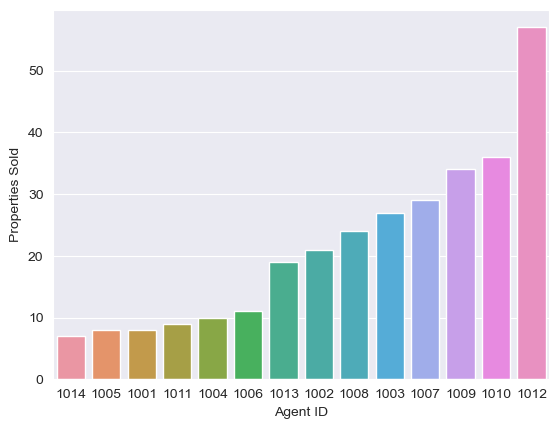

In [146]:
colors = sns.color_palette('light:b')[0:6]
sns.set_style("darkgrid")
g1 = sns.barplot(data=agent_performance1, x="Agent ID", y="Properties Sold", 
                 order=agent_performance1.sort_values('Properties Sold')['Agent ID']) 

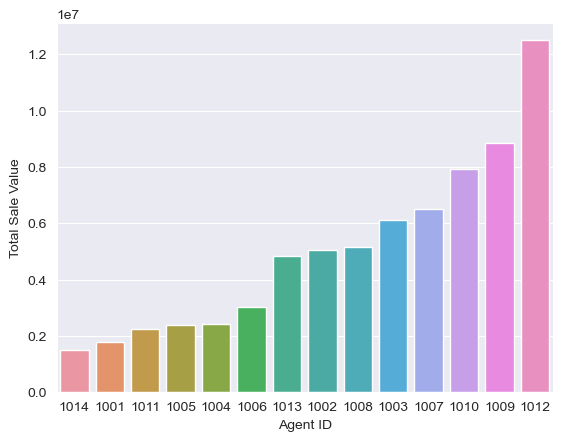

In [147]:
g2 = sns.barplot(data=agent_performance3, x="Agent ID", y="Total Sale Value",
                 order=agent_performance3.sort_values('Total Sale Value')['Agent ID'])

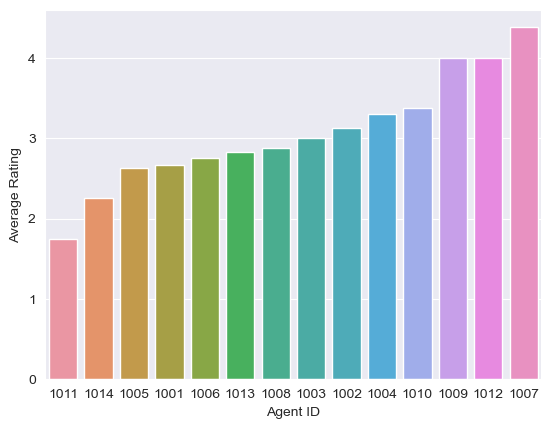

In [180]:
g3 = sns.barplot(data=agent_performance2, x="Agent ID", y="Average Rating",
                 order=agent_performance2.sort_values('Average Rating')['Agent ID'])

In [157]:
contribution = contribution.groupby(['Category'])['Total Sale Value'].sum().reset_index(name='Total Sales')

In [159]:
total = contribution['Total Sales'].sum()

In [160]:
contribution['Sales Contribution %'] = contribution['Total Sales']

In [162]:
contribution['Sales Contribution %'] = contribution['Sales Contribution %'] / total

In [163]:
contribution['Sales Contribution %'] = contribution['Sales Contribution %'] * 100

In [165]:
contribution

,Category,Total Sales,Sales Contribution %
0,Bottom 4,7947068,11.30069165414445942863867675
1,Middle 4,19138991,27.21555117716948209132988123
2,Top 6,43237672,61.48375716868605848003144202


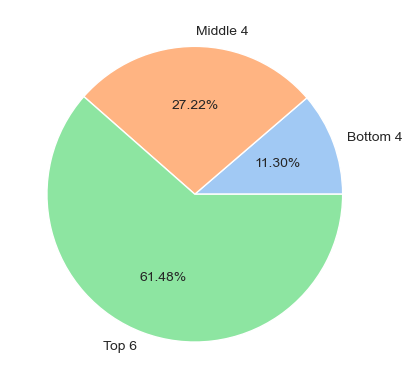

In [166]:
colors = sns.color_palette('pastel')[0:10]
g4 = plt.pie(contribution['Sales Contribution %'], labels = contribution['Category'], colors = colors, autopct='%.2f%%')